# Compensation factor measurement


Kompenzace válce je analyticky vypočítaná. Jiná je pro povrch, jiná je pro objem.
Kompenzace pro kulové plochy je vypočtena na základě měření. Pro oběm na základě inscribed, pro povrch na základě cylinder_surface

Pro nulovou délku tube (pill) je 
určen korekční faktor. 


Pro nenulové délky tube se objevují ještě artefakty na přechodu proto bylo stanoveno měření chyby na těchto přechodech.


Compensation is determined in two steps:


1. Sphere compensation

  1. For sphere compensation computation run `compensation method 1 sphere` in `run_experiments` script. 
  
  2. Use computed `x` and `y` in python scripts.
  
  3. Restart ipython kernel

2. Join compensation

  1. For sphere-tube join compensation run `compensation method measurement 1 tube` 

  2. Then use computed `x` and `y` in python scripts.

  3. restart ipython kernel

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run evaltools.ipynb

Populating the interactive namespace from numpy and matplotlib


/home/mjirik/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


0/3793


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns
import copy

In [4]:
# datapath = "~/teigen_data/output_rows.csv"

In [5]:
# plotkw ={
#     "figsize": [15, 6], 
#     # "fontsize": 14
#     # "linestyle": "-",
#     # "marker": "x"
# }

In [6]:
# available_radius_methods = [
#     "inscribed", "circumscribed", 
#     "average",
#     "cylinder volume", 
#     "cylinder surface", 
#     "cylinder volume + sphere error",
#     "cylinder volume + sphere error + man",
#     "cylinder surface + sphere error",
#     "cylinder surface + sphere error + join error",
#     "cylinder surface + sphere error + join error man",
#     "best",
    
# ]

In [7]:
# scripts can be runned
# %run run_experiments.ipynb

In [8]:
# df = pd.read_csv(op.expanduser(datapath))
# # remove duplicates
# ks = copy.copy(list(df.keys()))
# ks.remove("datetime")
# df = df.drop_duplicates(ks)

# df = df.drop_duplicates()
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100

df = read_data(datapath)
# df = select_df(df, newer_than="2017-10-10")
df["measurement_resolution"] = df["config postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["config generators Unconnected tubes length_distribution_mean"]
df["radius_distribution_mean"] = df["config generators Unconnected tubes radius_distribution_mean"]
df

,config appearance force_rewrite,config appearance noise_preview,config appearance show_aposteriori_surface,config appearance skip_volume_generation,config appearance surface_3d_preview,config areasampling areasize_mm,config areasampling areasize_px,config areasampling voxelsize_mm,config filepattern,config filepattern_abspath,...,measurement_resolution,length_distribution_mean,radius_distribution_mean,element_number,element number,measurement resolution,step 1 time [s],step 2 time [s],total time [s],radius method
0,False,False,True,False,False,"[10.0, 10.0, 10.0]","[20.0, 20.0, 20.0]","[0.5, 0.5, 0.5]",~/teigen_data/teigen_resolution_mm_0.5_{series...,~/teigen_data/teigen_resolution_mm_0.5_001/dat...,...,35,3.0,0.2,30.0,30.0,35,102.029161,NaN,NaN,inscribed
1,False,False,True,False,False,"[10.0, 10.0, 10.0]","[20.0, 20.0, 20.0]","[0.5, 0.5, 0.5]",~/teigen_data/teigen_resolution_mm_0.5_{series...,~/teigen_data/teigen_resolution_mm_0.5_001/dat...,...,35,3.0,0.2,30.0,30.0,35,102.029161,0.361223,102.390384,inscribed
2,False,False,True,False,False,"[10.0, 10.0, 10.0]","[25.0, 25.0, 25.0]","[0.4, 0.4, 0.4]",~/teigen_data/teigen_resolution_mm_0.4_{series...,~/teigen_data/teigen_resolution_mm_0.4_001/dat...,...,35,3.0,0.2,30.0,30.0,35,97.035680,0.361223,97.396903,inscribed
3,False,False,True,False,False,"[10.0, 10.0, 10.0]","[25.0, 25.0, 25.0]","[0.4, 0.4, 0.4]",~/teigen_data/teigen_resolution_mm_0.4_{series...,~/teigen_data/teigen_resolution_mm_0.4_001/dat...,...,35,3.0,0.2,30.0,30.0,35,97.035680,0.289337,97.325017,inscribed
4,False,False,True,False,False,"[10.0, 10.0, 10.0]","[33.333333333333336, 33.333333333333336, 33.33...","[0.3, 0.3, 0.3]",~/teigen_data/teigen_resolution_mm_0.3_{series...,~/teigen_data/teigen_resolution_mm_0.3_001/dat...,...,35,3.0,0.2,30.0,30.0,35,96.892248,0.289337,97.181585,inscribed
5,False,False,True,False,False,"[10.0, 10.0, 10.0]","[33.333333333333336, 33.333333333333336, 33.33...","[0.3, 0.3, 0.3]",~/teigen_data/teigen_resolution_mm_0.3_{series...,~/teigen_data/teigen_resolution_mm_0.3_001/dat...,...,35,3.0,0.2,30.0,30.0,35,96.892248,0.317081,97.209329,inscribed
6,False,False,True,False,False,"[10.0, 10.0, 10.0]","[50.0, 50.0, 50.0]","[0.2, 0.2, 0.2]",~/teigen_data/teigen_resolution_mm_0.2_{series...,~/teigen_data/teigen_resolution_mm_0.2_001/dat...,...,35,3.0,0.2,30.0,30.0,35,97.318284,0.317081,97.635365,inscribed
7,False,False,True,False,False,"[10.0, 10.0, 10.0]","[50.0, 50.0, 50.0]","[0.2, 0.2, 0.2]",~/teigen_data/teigen_resolution_mm_0.2_{series...,~/teigen_data/teigen_resolution_mm_0.2_001/dat...,...,35,3.0,0.2,30.0,30.0,35,97.318284,0.397767,97.716051,inscribed
8,False,False,True,False,False,"[10.0, 10.0, 10.0]","[100.0, 100.0, 100.0]","[0.1, 0.1, 0.1]",~/teigen_data/teigen_resolution_mm_0.1_{series...,~/teigen_data/teigen_resolution_mm_0.1_001/dat...,...,35,3.0,0.2,30.0,30.0,35,96.918674,0.397767,97.316441,inscribed
9,False,False,True,False,False,"[10.0, 10.0, 10.0]","[100.0, 100.0, 100.0]","[0.1, 0.1, 0.1]",~/teigen_data/teigen_resolution_mm_0.1_{series...,~/teigen_data/teigen_resolution_mm_0.1_001/dat...,...,35,3.0,0.2,30.0,30.0,35,96.918674,0.938781,97.857455,inscribed


In [9]:
newer_than = pd.to_datetime("2017-10-10 11:57:00.0")
newer_than

Timestamp('2017-10-10 11:57:00')

In [10]:
print(step2_datetime_key)
# pd.to_datetime(df[step2_datetime_key])
which_keep_time = pd.to_datetime(df[step2_datetime_key]) > pd.to_datetime(newer_than)
which_keep_time

processing_info step2_finish_datetime


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9661     True
9663     True
9665     True
9667     True
9669     True
9671     True
9673     True
9675     True
9677     True
9679     True
9681     True
9683     True
9685     True
9687     True
9689     True
9691     True
9693     True
9695     True
9697     True
9699     True
9701     True
9703     True
9705     True
9707     True
9709     True
9711     True
9713     True
9715     True
9717     True
9719     True
Name: processing_info step2_finish_datetime, Length: 3793, dtype: bool

In [11]:
def show_radius(dfs, x_key="measurement resolution"):
    dfsp = dfs[["sphere_radius_volume_estimation_numeric", "sphere_radius_surface_estimation_numeric", x_key]].sort_values(
        x_key).sort_values(x_key)
    
    if len(dfsp) < 1:
        return dfsp
    # fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(111)
    dfsp.plot(
        ax=ax, x=x_key, **plotkw)
    # ax = plt.subplot(122)
    # dfsp[["volume error [%]"]].plot(
    #     ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method + " ({})".format(len(dfs)))
    return dfsp

def show_error(dfs, x_key="measurement resolution"):
    
    dfsp = dfs[["surface error [%]", "volume error [%]", 
                x_key]].sort_values(x_key)

    if len(dfsp) < 1:
        return dfsp
    # wilcoxon - čím větší, tím lepší, alespoň 0.05
    surf_w = scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    surf_s = scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])
    
    # wilcoxon - čím větší, tím lepší
    vol_w = scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    vol_s = scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])
    
    print radius_method, ": \nsurface (w/s): \n" , surf_w,"\n", surf_s, "\nvolume (w/s): \n", vol_w, "\n",vol_s, "\n", len(dfsp)

    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(141)
    dfsp.plot(
        ax=ax, x=x_key, **plotkw)
    ax = plt.subplot(142)
    dfsp[["volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    ax = plt.subplot(143)
    dfsp[["surface error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    
    ax = plt.subplot(144)
    dfsp[dfsp["measurement resolution"] > dfsp["measurement resolution"].mean()].plot(
        ax=ax, x=x_key, **plotkw)
    plt.suptitle(radius_method)
    return dfsp

# Cylinder surface and volume analytic compensation

Regular polygon equivalent surface area $eqS$ is used for cylinder volume compensation 

$$ 
r_{eqS} = \sqrt{\frac{\theta r^2}{\sin{\theta}}} 
\qquad
\theta = \frac{2 \pi}{n}
$$

Regular polygon equivalent perimeter $eqP$ is used for cylinder surface compensation

$$
r_{eqP} = \frac{\theta r}{
  2 \sin{\frac{\theta}{2}}
}
\qquad
\theta = \frac{2 \pi}{n}
$$


## 1 Cylinder - check

In [12]:
for radius_method in available_radius_methods:
    
    dfs = df[
        df[note_key] == "compensation method 1 cylinder " + radius_method
    ]
    print len(dfs)
    if len(dfs) > 1:
        dfsp = show_error(dfs) #, x_key="radius_distribution_mean")

0
0
0
0
0
0
0
0
0
0
0
0


# Sphere radius from volume and surface estimation


$$ r_0 r_c = \frac{1}{2} \sqrt{\frac{S}{\pi}}$$ 
$$ r_0 r_c = \sqrt[3]{\frac{3 V}{4 \pi}}$$ 

In [13]:
# df

In [14]:
# 1 object in scene, 0 variances
# for spheres this would be 0
df["cylinder_volume"] = np.pi * df["radius_distribution_mean"]**2 * df["length_distribution_mean"]
df["cylinder_surface"] = 2 * np.pi * df["radius_distribution_mean"] * df["length_distribution_mean"]

df["sphere_numeric_volume"] = (df["numeric volume [mm^3]"] - df["cylinder_volume"])
df["sphere_volume"] = (df["volume [mm^3]"] - df["cylinder_volume"])
df["sphere_numeric_surface"] = (df["numeric surface [mm^2]"] - df["cylinder_surface"])
df["sphere_surface"] = (df["surface [mm^2]"] - df["cylinder_surface"])

df["sphere_radius_volume_estimation_numeric"] = ((3 * df["sphere_numeric_volume"] / (4* np.pi))**(1.0/3.0))
df["sphere_radius_volume_estimation"] = ((3 * df["sphere_volume"] / (4* np.pi))**(1.0/3.0))
df["sphere_radius_surface_estimation_numeric"] = ((df["sphere_numeric_surface"] / (4 * np.pi))**(.5))
df["sphere_radius_surface_estimation"] = ((df["sphere_surface"] / (4* np.pi))**(.5))

# for sphere and cylinder join compensation
# this works only if sphere error is compensated to 0
# join error is composed from two joins of spheres and cylinder
df["join_surface_error"] = df["sphere_numeric_surface"] - df["sphere_surface"]
# surface of the sphere 
df["sphere_join_numeric_surface"] = df["sphere_surface"] + 0.5 * df["join_surface_error"]
df["sphere_radius_join_surface_estimation_numeric"] = ((df["sphere_join_numeric_surface"] / (4 * np.pi))**(.5))
df["sphere_radius_join_surface_estimation"] = ((df["sphere_surface"] / (4* np.pi))**(.5))

df["join_volume_error"] = df["sphere_numeric_volume"] - df["sphere_volume"]
# surface of the sphere 
df["sphere_join_numeric_volume"] = df["sphere_volume"] + 0.5 * df["join_volume_error"]
df["sphere_radius_join_surface_estimation_numeric"] = ((df["sphere_join_numeric_volume"] / (4 * np.pi))**(.5))
df["sphere_radius_join_surface_estimation"] = ((df["sphere_volume"] / (4* np.pi))**(.5))


available_radius_methods = [
    "inscribed", "circumscribed", 
    "average",
    "cylinder volume", 
    "cylinder surface", 
    "cylinder volume + sphere error",
    "cylinder surface + sphere error",
    "cylinder surface + sphere error + join error",
    "best",
    
]
for radius_method in ["inscribed"]:
        
    dfs = df[
        df[note_key] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    # show_radius(dfs)

## Sphere volume compensation factor interpolation

It is usede in `"cylinder volume + sphere error"`
Calculate `x` and `y` coefficients and copy it into `tb_vtk.py` file in

    ...
    def polygon_radius_compensation_factos(
        ...
    ):
    ...
    x_cvse = [ ... ]
    y_cvse = [ ... ]


x_cvse = [5, 6, 7, 8, 10, 12, 14, 17, 19, 21, 23, 29, 30, 31, 34, 36, 39, 42, 44, 46, 48, 50, 53, 58, 60, 63, 67, 70, 73, 78, 80, 84, 87, 90, 95, 200, ]
y_cvse = [0.866160332119, 0.914382318859, 0.933968032022, 0.95218918453, 0.969538675931, 0.978911309831, 0.984540924039, 0.989327370812, 0.99148526871, 0.993049172195, 0.994218638187, 0.996381334592, 0.996658189571, 0.996837044536, 0.997400277914, 0.997681875142, 0.998008753883, 0.998298249903, 0.998449773378, 0.998581941074, 0.998697885167, 0.998800171243, 0.998925745446, 0.999108829618, 0.999167352826, 0.999240932216, 0.999328288662, 0.999388558376, 0.999435320417, 0.999507694313, 0.999532038584, 0.999575592385, 0.999602900653, 0.999630352291, 0.999667137992, 1.0, ]


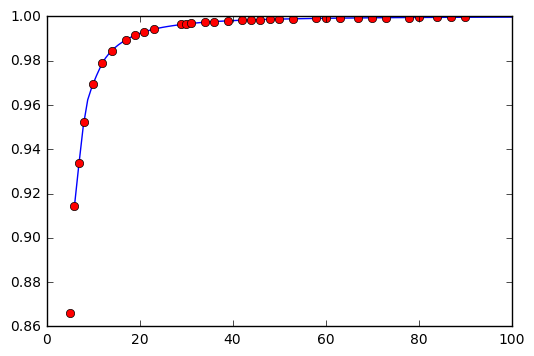

In [39]:
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline

radius_method = "inscribed"
dfs = df[
    df[note_key] == "compensation method 1 sphere " + radius_method
]

if len(dfs) > 1:
    dfsm = dfs.groupby("measurement_resolution").mean().reset_index()

    x = list(dfsm["measurement_resolution"])
    y = list(dfsm["sphere_radius_volume_estimation_numeric"] / dfsm["sphere_radius_volume_estimation"])

    # x.append(100)
    # y.append(1.0)

    x.append(200)
    y.append(1.0)

    x = np.asarray(x)
    y = np.asarray(y)
    spl1 = InterpolatedUnivariateSpline(x, y)
    # spl1 = UnivariateSpline(x, y,k=5)
    # spl1.set_smoothing_factor(0.1)
    xs = np.linspace(6, 100, 100)

    plt.plot(
        xs[:], spl1(xs[:]), "b" , 
        x[:-2], y[:-2], "ro", 
    )
    stx = "x_cvse = ["
    for i in x:
        stx = stx + str(i) + ", "
    stx += "]"
    sty = "y_cvse = ["
    for i in y:
        sty = sty + str(i) + ", "
    sty += "]"
    print stx
    print sty

### Zoom to most exposed part

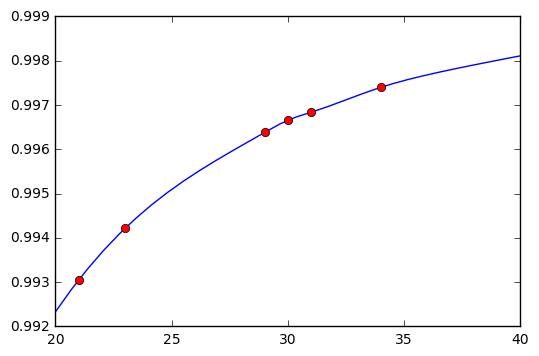

In [48]:

xs = np.linspace(20, 40, 30)

plt.plot(
    xs[:], spl1(xs[:]), "b" , 
    x[9:15], y[9:15], "ro", 
)

In [16]:
# keys = list_filter(df.keys(), contain="areasize_mm")
# df[keys[0]]
# dfs

,config appearance force_rewrite,config appearance noise_preview,config appearance show_aposteriori_surface,config appearance skip_volume_generation,config appearance surface_3d_preview,config areasampling areasize_mm,config areasampling areasize_px,config areasampling voxelsize_mm,config filepattern,config filepattern_abspath,...,sphere_radius_volume_estimation_numeric,sphere_radius_volume_estimation,sphere_radius_surface_estimation_numeric,sphere_radius_surface_estimation,join_surface_error,sphere_join_numeric_surface,sphere_radius_join_surface_estimation_numeric,sphere_radius_join_surface_estimation,join_volume_error,sphere_join_numeric_volume
7921,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.041520,1.044983,1.042494,1.045073,-0.067675,13.690881,0.615212,0.616741,-0.047360,4.756188
7931,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.185586,1.189509,1.186814,1.189728,-0.087030,17.743595,0.747167,0.749016,-0.069521,7.015280
7941,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.034835,1.038379,1.035723,1.038379,-0.069243,13.514837,0.609344,0.610905,-0.047857,4.665897
7951,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.116221,1.119900,1.117508,1.120234,-0.076643,15.731522,0.682557,0.684239,-0.057780,5.854477
7961,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.003407,1.006844,1.004268,1.006844,-0.065102,12.706414,0.581797,0.583287,-0.043628,4.253569
8021,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.037728,1.044983,1.039669,1.045073,-0.141592,13.653923,0.613544,0.616741,-0.098858,4.730439
8031,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.181293,1.189509,1.183624,1.189728,-0.182066,17.696077,0.745152,0.749016,-0.145070,6.977505
8041,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.031088,1.038379,1.032917,1.038379,-0.142189,13.478364,0.607702,0.610905,-0.098100,4.640776
8051,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,1.112199,1.119900,1.114525,1.120234,-0.160319,15.689684,0.680726,0.684239,-0.120535,5.823100
8061,False,False,True,True,False,"[10.0, 10.0, 10.0]","[50, 50, 50]","[0.2, 0.2, 0.2]",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,~/teigen_data/005/data{:06d}.jpg,...,0.999774,1.006844,1.001547,1.006844,-0.133683,12.672123,0.580229,0.583287,-0.089431,4.230667


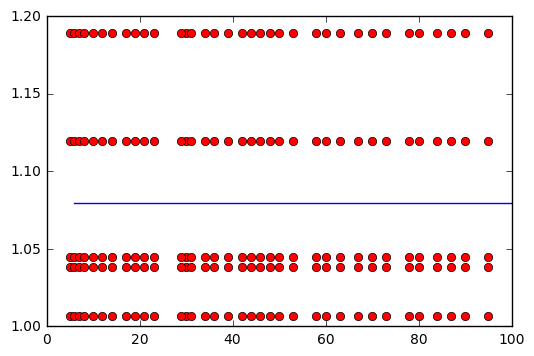

In [17]:
import scipy
import copy
if len(dfs) > 1:
    # f = scipy.interpolate.interp1d(x,y, kind="quadratic", fill_value="extrapolate")
    x = np.asarray(list(dfs["measurement_resolution"]))
    y = np.asarray(list(dfs["sphere_radius_volume_estimation"]))

    z = np.polyfit(x,y, 2)
    f = np.poly1d(z)
    plt.plot(x, y, "ro")
    plt.plot(xs, f(xs), "b")
    plt.show()

/home/mjirik/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp
/home/mjirik/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in multiply
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  1.07992287e+00  -1.55978007e-10   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00]


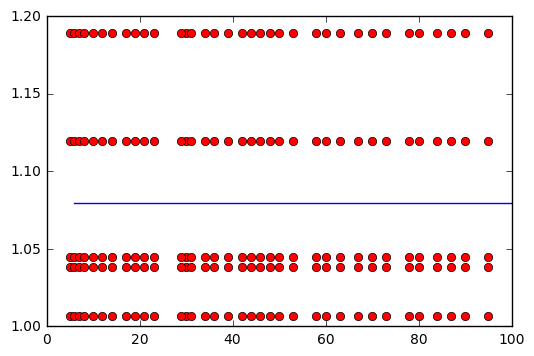

In [18]:
from scipy.optimize import curve_fit
    
def func(x, a, b, c, e, f, g):
    return a*np.exp(-b * x) # + # c + np.sin(e*x + f) * np.exp(g*x)



def func1(x, theta, omega0, K):
    jmt = (1 - theta**2)**0.5
    out = K * (1 - 1/jmt * np.exp(-1 * theta * omega0 * x))
    # out = K * (1 - (1 / jmt * np.exp(-1 * theta * omega0 * x)) * np.sin(omega0 * jmt * x)) 
    #+ np.arccos(theta))
    return out

if len(dfs) > 1:
    x = np.asarray(list(dfs["measurement_resolution"]))
    y = np.asarray(list(dfs["sphere_radius_volume_estimation"]))

    popt, pcov = curve_fit(func, x, y, bounds=(-np.inf, np.inf))
    print popt

    plt.plot(xs, func(xs, *popt), "b")
    plt.plot(x, y, "ro")
    plt.show()

## Sphere surface compensation factor interpolation

Calculate `x` and `y` coefficients for `cylinder surface + sphere compensation` and copy it into `tb_vtk.py` file in

    ...
    def polygon_radius_compensation_factos(
        ...
    ):
        ...
        x_csse = [ ... ]
        y_csse = [ ... ]



,sphere_radius_volume_estimation_numeric,sphere_radius_surface_estimation_numeric,measurement resolution
0,0.935386,0.972670,5
1,0.987462,1.011868,6
2,1.008613,1.027113,7
3,1.028291,1.041807,8
4,1.047027,1.055628,10
5,1.057149,1.063120,12
6,1.063228,1.067630,14
7,1.068397,1.071463,17
8,1.070728,1.073198,19
9,1.072417,1.074456,21


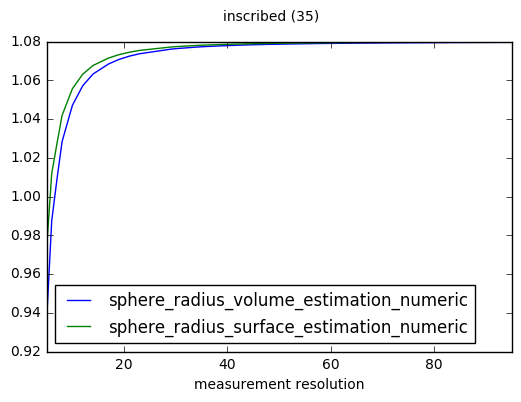

In [19]:
radius_method = "cylinder surface"
radius_method = "inscribed"
dfs = df[
    df[note_key] == "compensation method 1 sphere " + radius_method
]
dfsm = dfs.groupby("measurement_resolution").mean().reset_index()

show_radius(dfsm)

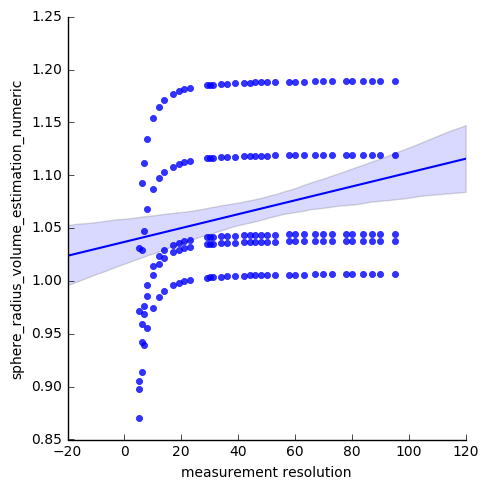

In [20]:
sns.lmplot(data=dfs, x="measurement resolution", y="sphere_radius_volume_estimation_numeric")

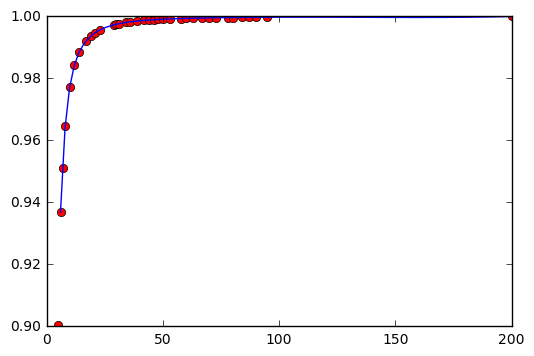

x_csse = [5, 6, 7, 8, 10, 12, 14, 17, 19, 21, 23, 29, 30, 31, 34, 36, 39, 42, 44, 46, 48, 50, 53, 58, 60, 63, 67, 70, 73, 78, 80, 84, 87, 90, 95, 200, ]
y_csse = [0.900576771582, 0.936869836439, 0.950985318762, 0.964590043529, 0.977386494167, 0.984323254476, 0.988498485354, 0.992048202584, 0.993654556051, 0.994819174883, 0.995690300838, 0.997301856778, 0.997508981673, 0.997641534309, 0.998061908546, 0.998271760101, 0.998515046246, 0.998731160009, 0.998844108505, 0.998942638136, 0.999029070544, 0.999105325336, 0.99919881978, 0.999335448082, 0.99937908559, 0.99943387055, 0.999500058848, 0.999544024835, 0.999578847301, 0.999632860646, 0.999651016253, 0.99968349269, 0.999703829344, 0.999724328432, 0.999751740122, 1.0, ]


In [21]:
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
if len(dfsm) > 0:
    x = list(dfsm["measurement resolution"])
    y = list(dfsm["sphere_radius_surface_estimation_numeric"] / dfsm["sphere_radius_surface_estimation"])

    # x.append(100)
    # y.append(1.0)

    x.append(200)
    y.append(1.0)

    x = np.asarray(x)
    y = np.asarray(y)
    spl1 = InterpolatedUnivariateSpline(x, y)
    # spl1.set_smoothing_factor(0.1)
    xs = np.linspace(6, 200, 100)

    plt.figure()
    plt.plot(x[:], y[:], "ro")
    plt.plot(xs[:], spl1(xs[:]), "b")
    plt.show()
    stx = "x_csse = ["
    for i in x:
        stx = stx + str(i) + ", "
    stx += "]"
    sty = "y_csse = ["
    for i in y:
        sty = sty + str(i) + ", "
    sty += "]"
    print stx
    print sty

# Evaluation on the same dataset

After `x` and `y` is written in the `tb_vtk.py` and experiments are re-runned

## Evaluation on 1 sphere

inscribed : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.8082562147130171e-30) 
SpearmanrResult(correlation=0.92518238203233805, pvalue=1.0563268433716987e-74) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.8082562147130171e-30) 
SpearmanrResult(correlation=0.88814949166482948, pvalue=2.6149998187414588e-60) 
175
cylinder volume : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.8082562147130171e-30) 
SpearmanrResult(correlation=0.96557462746558187, pvalue=4.2089304126380024e-103) 
volume (w/s): 
WilcoxonResult(statistic=1517.0, pvalue=3.1871377334197794e-20) 
SpearmanrResult(correlation=0.97909203237294462, pvalue=1.388798878494895e-121) 
175
cylinder surface : 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.2393170660537839e-30) 
SpearmanrResult(correlation=0.96404427425724315, pvalue=4.4950975714316946e-102) 
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.2393170660537839e-30) 
SpearmanrResult(correlation=0.94054250189663036, pvalue=1.6316743

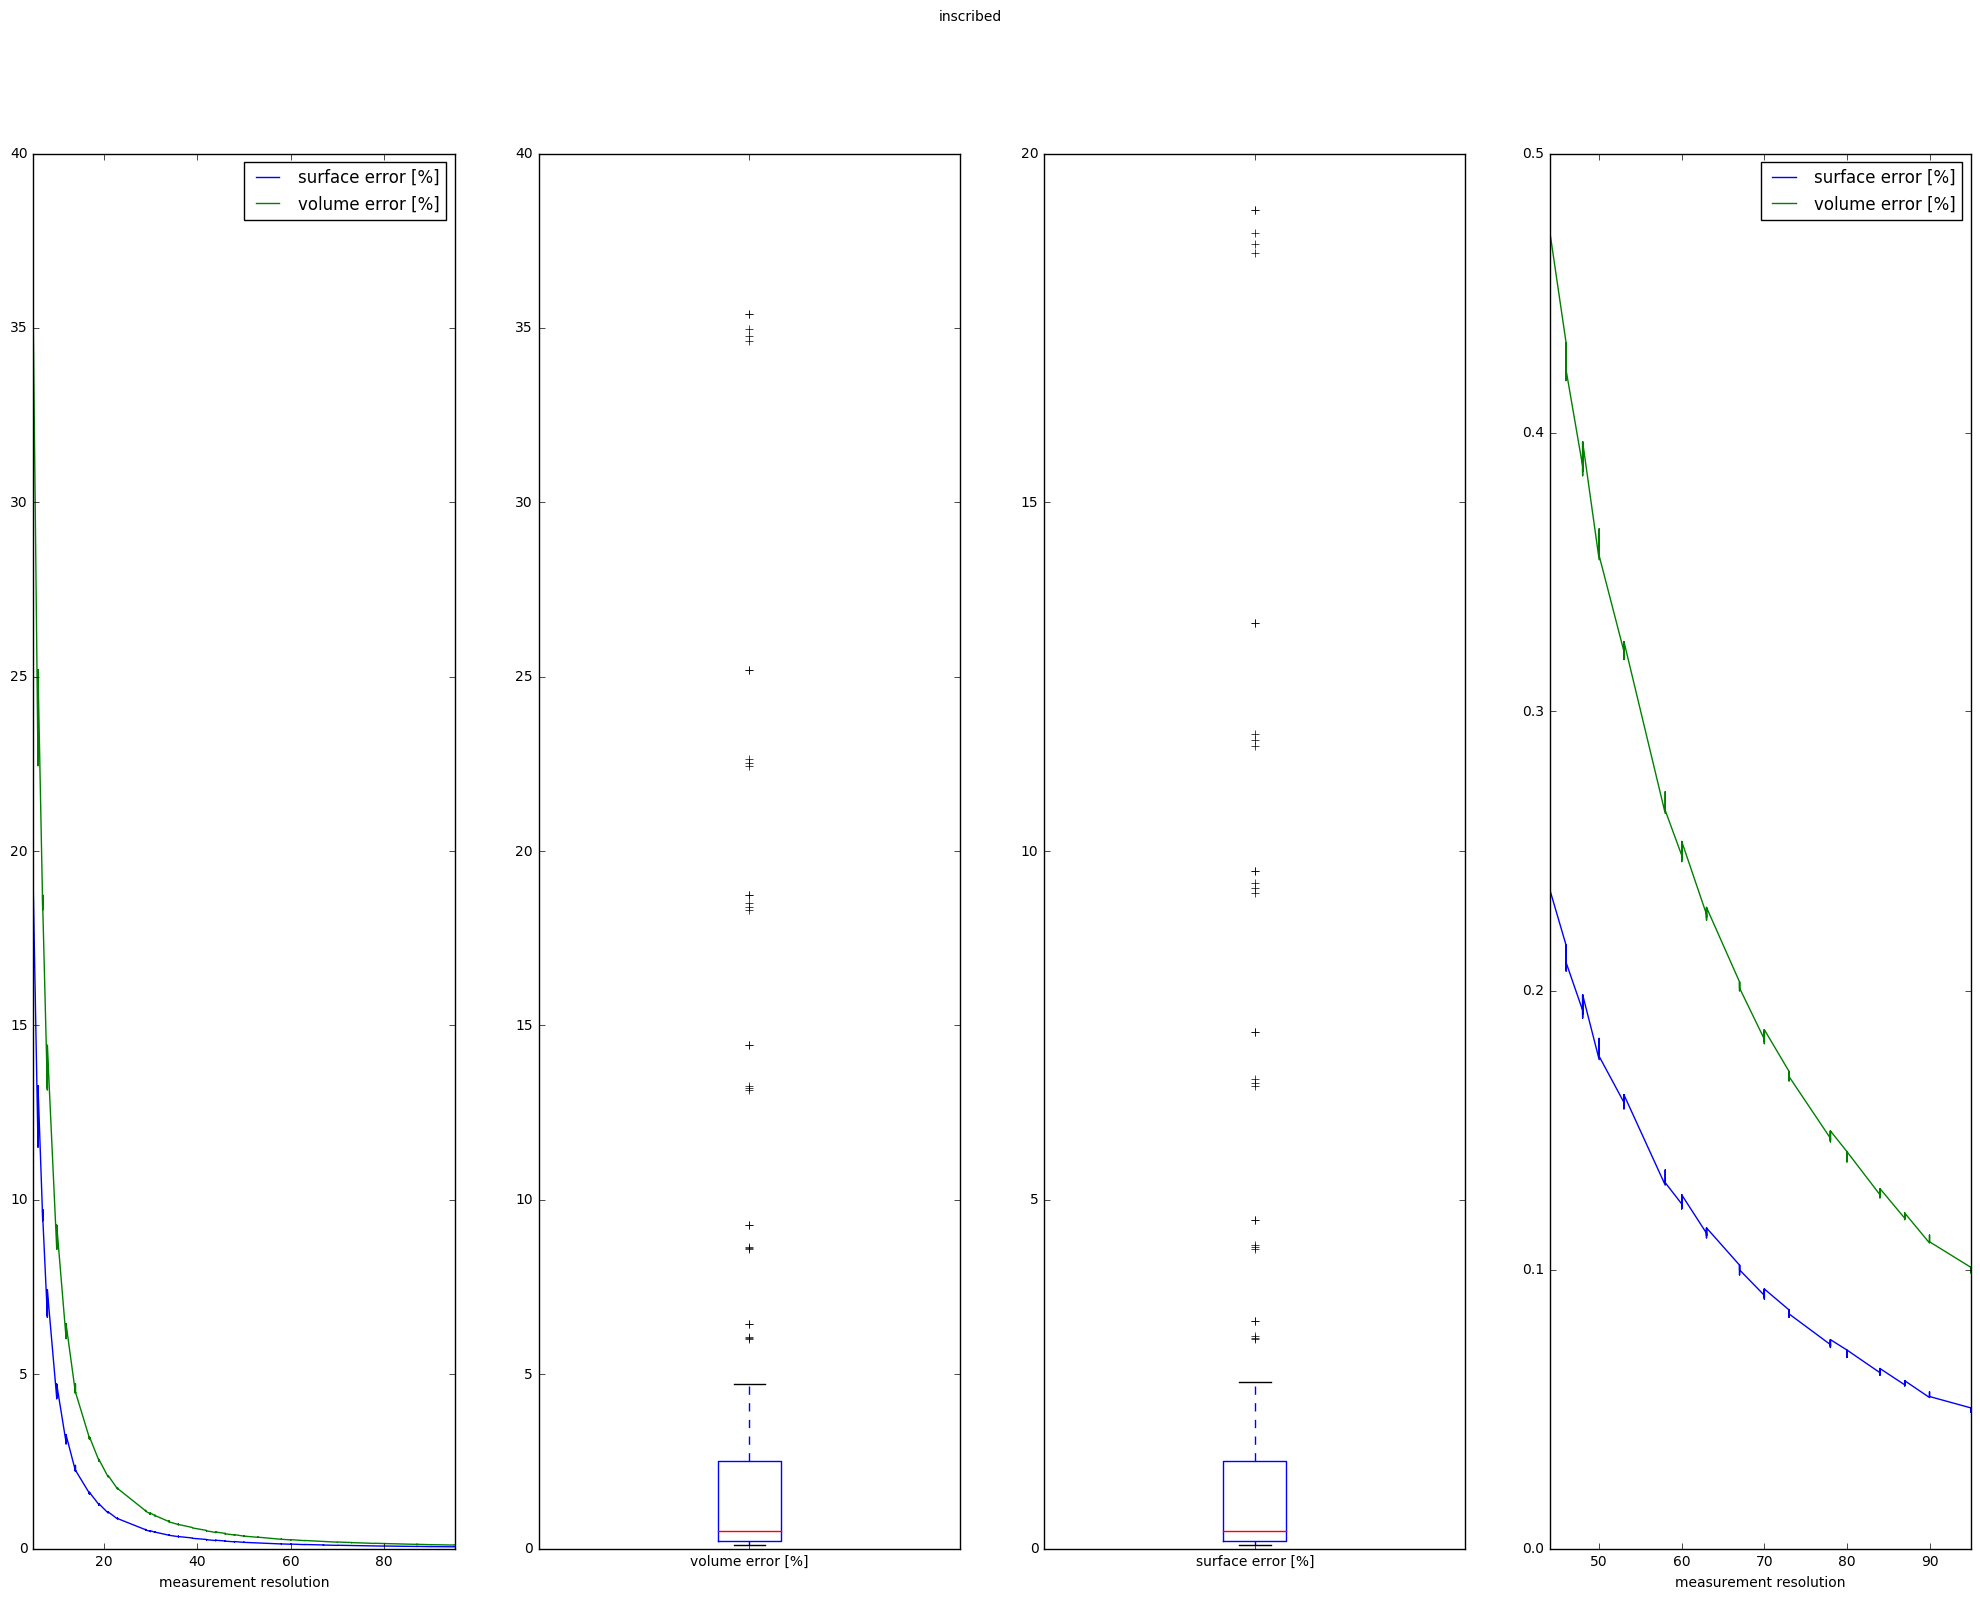

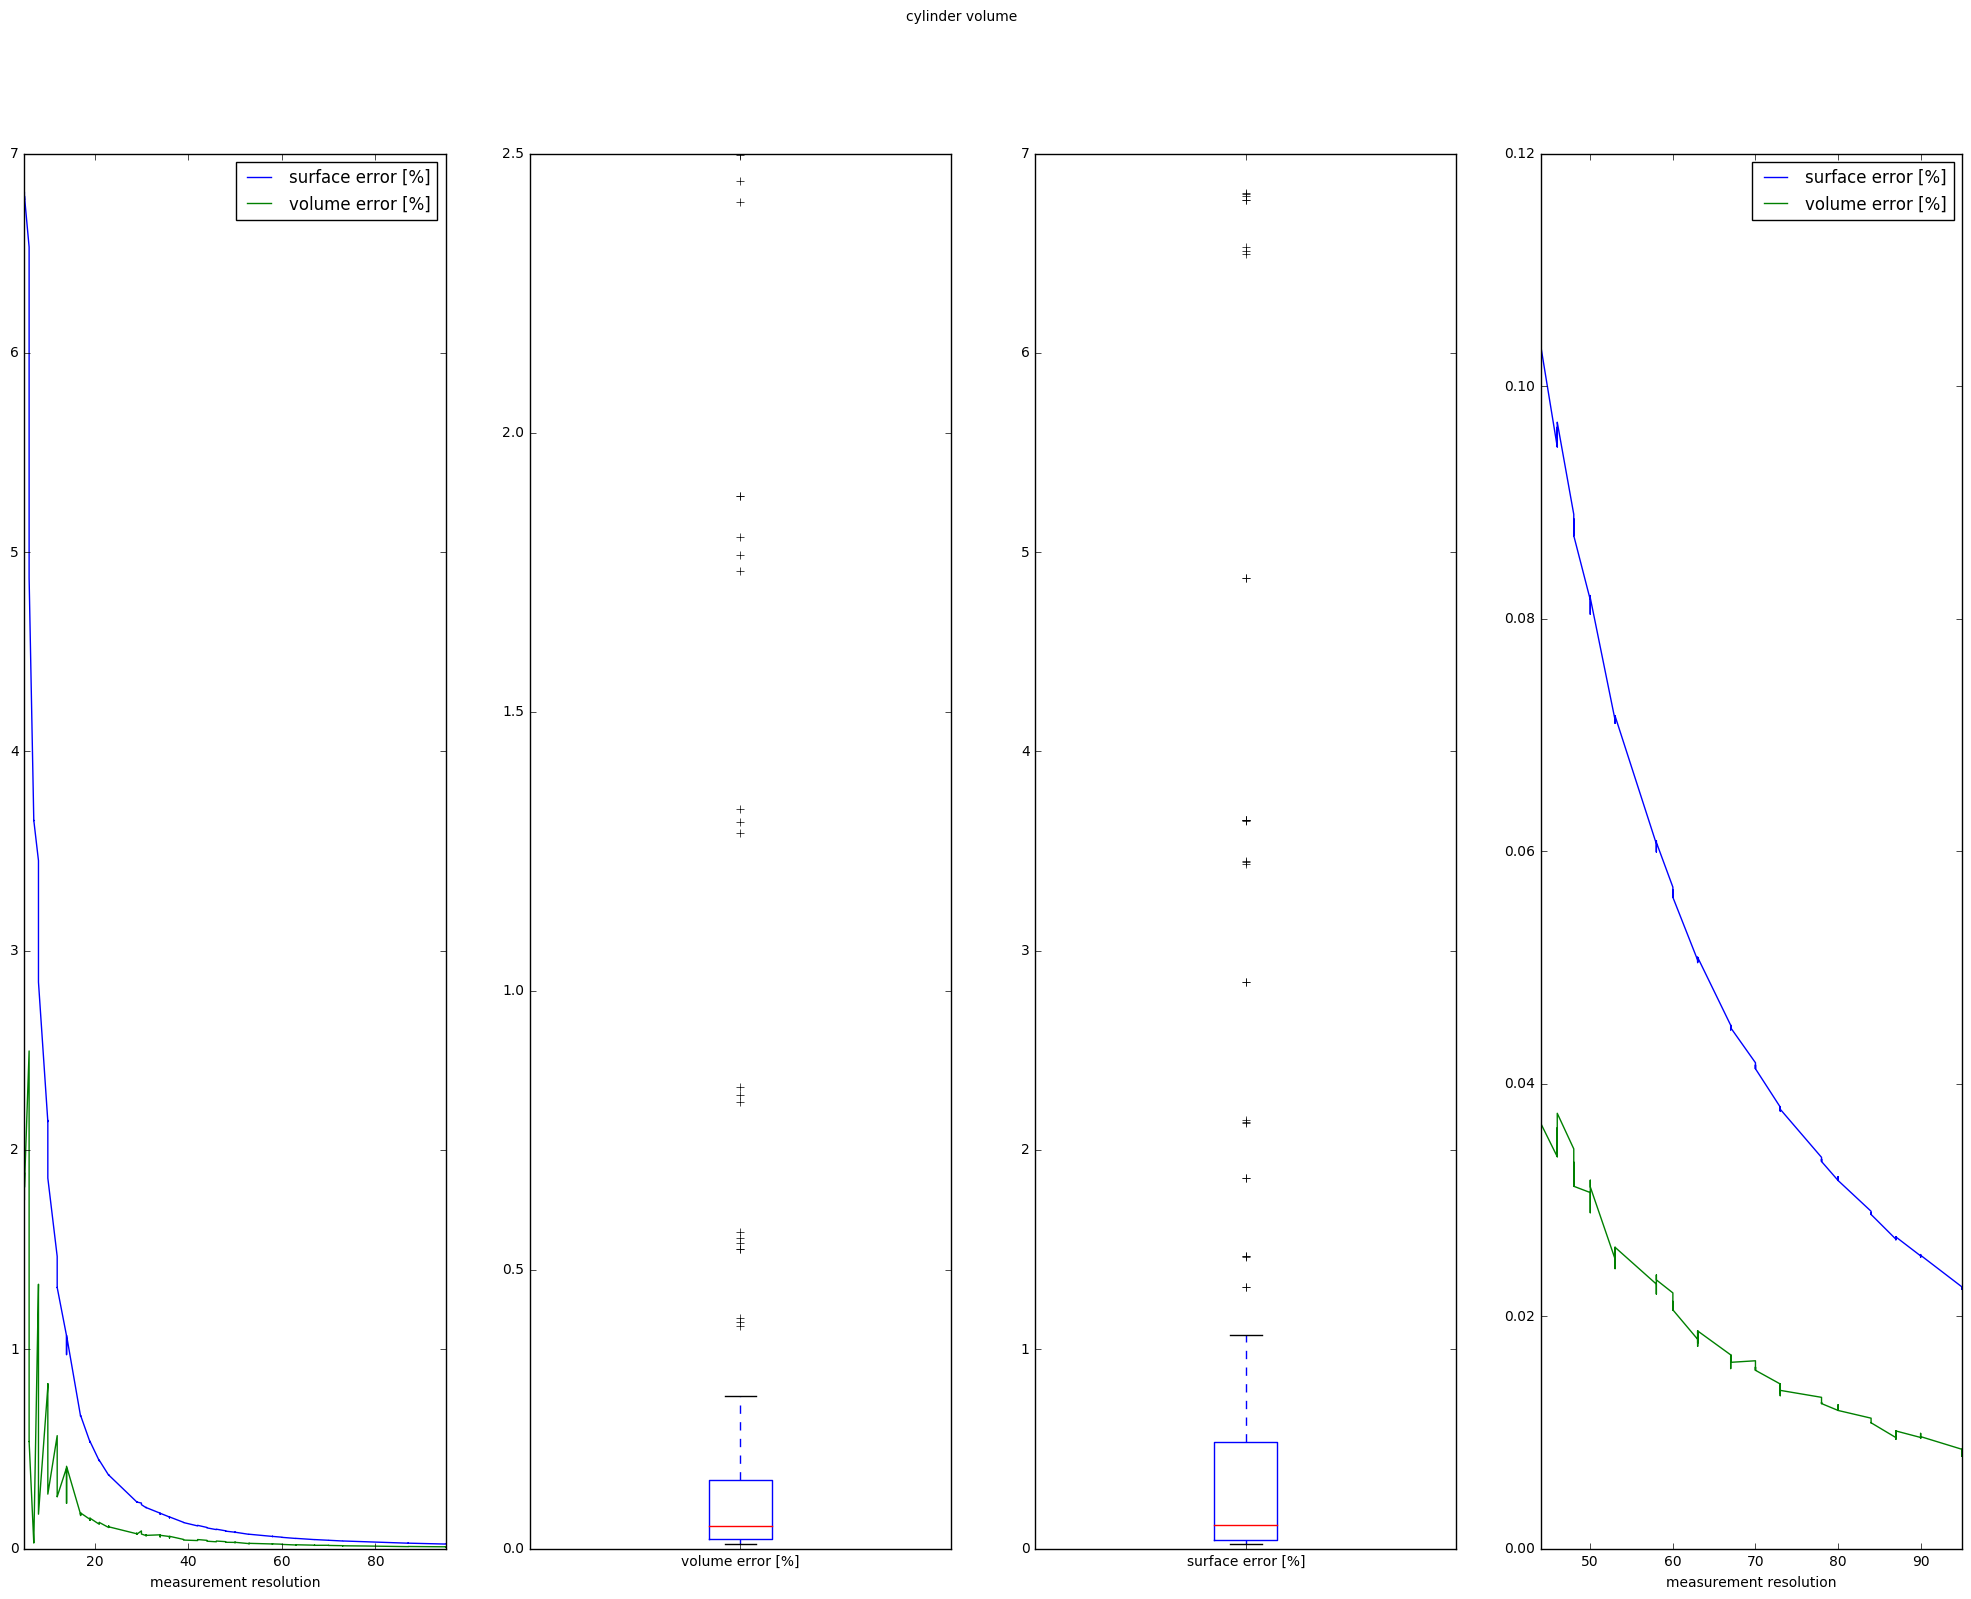

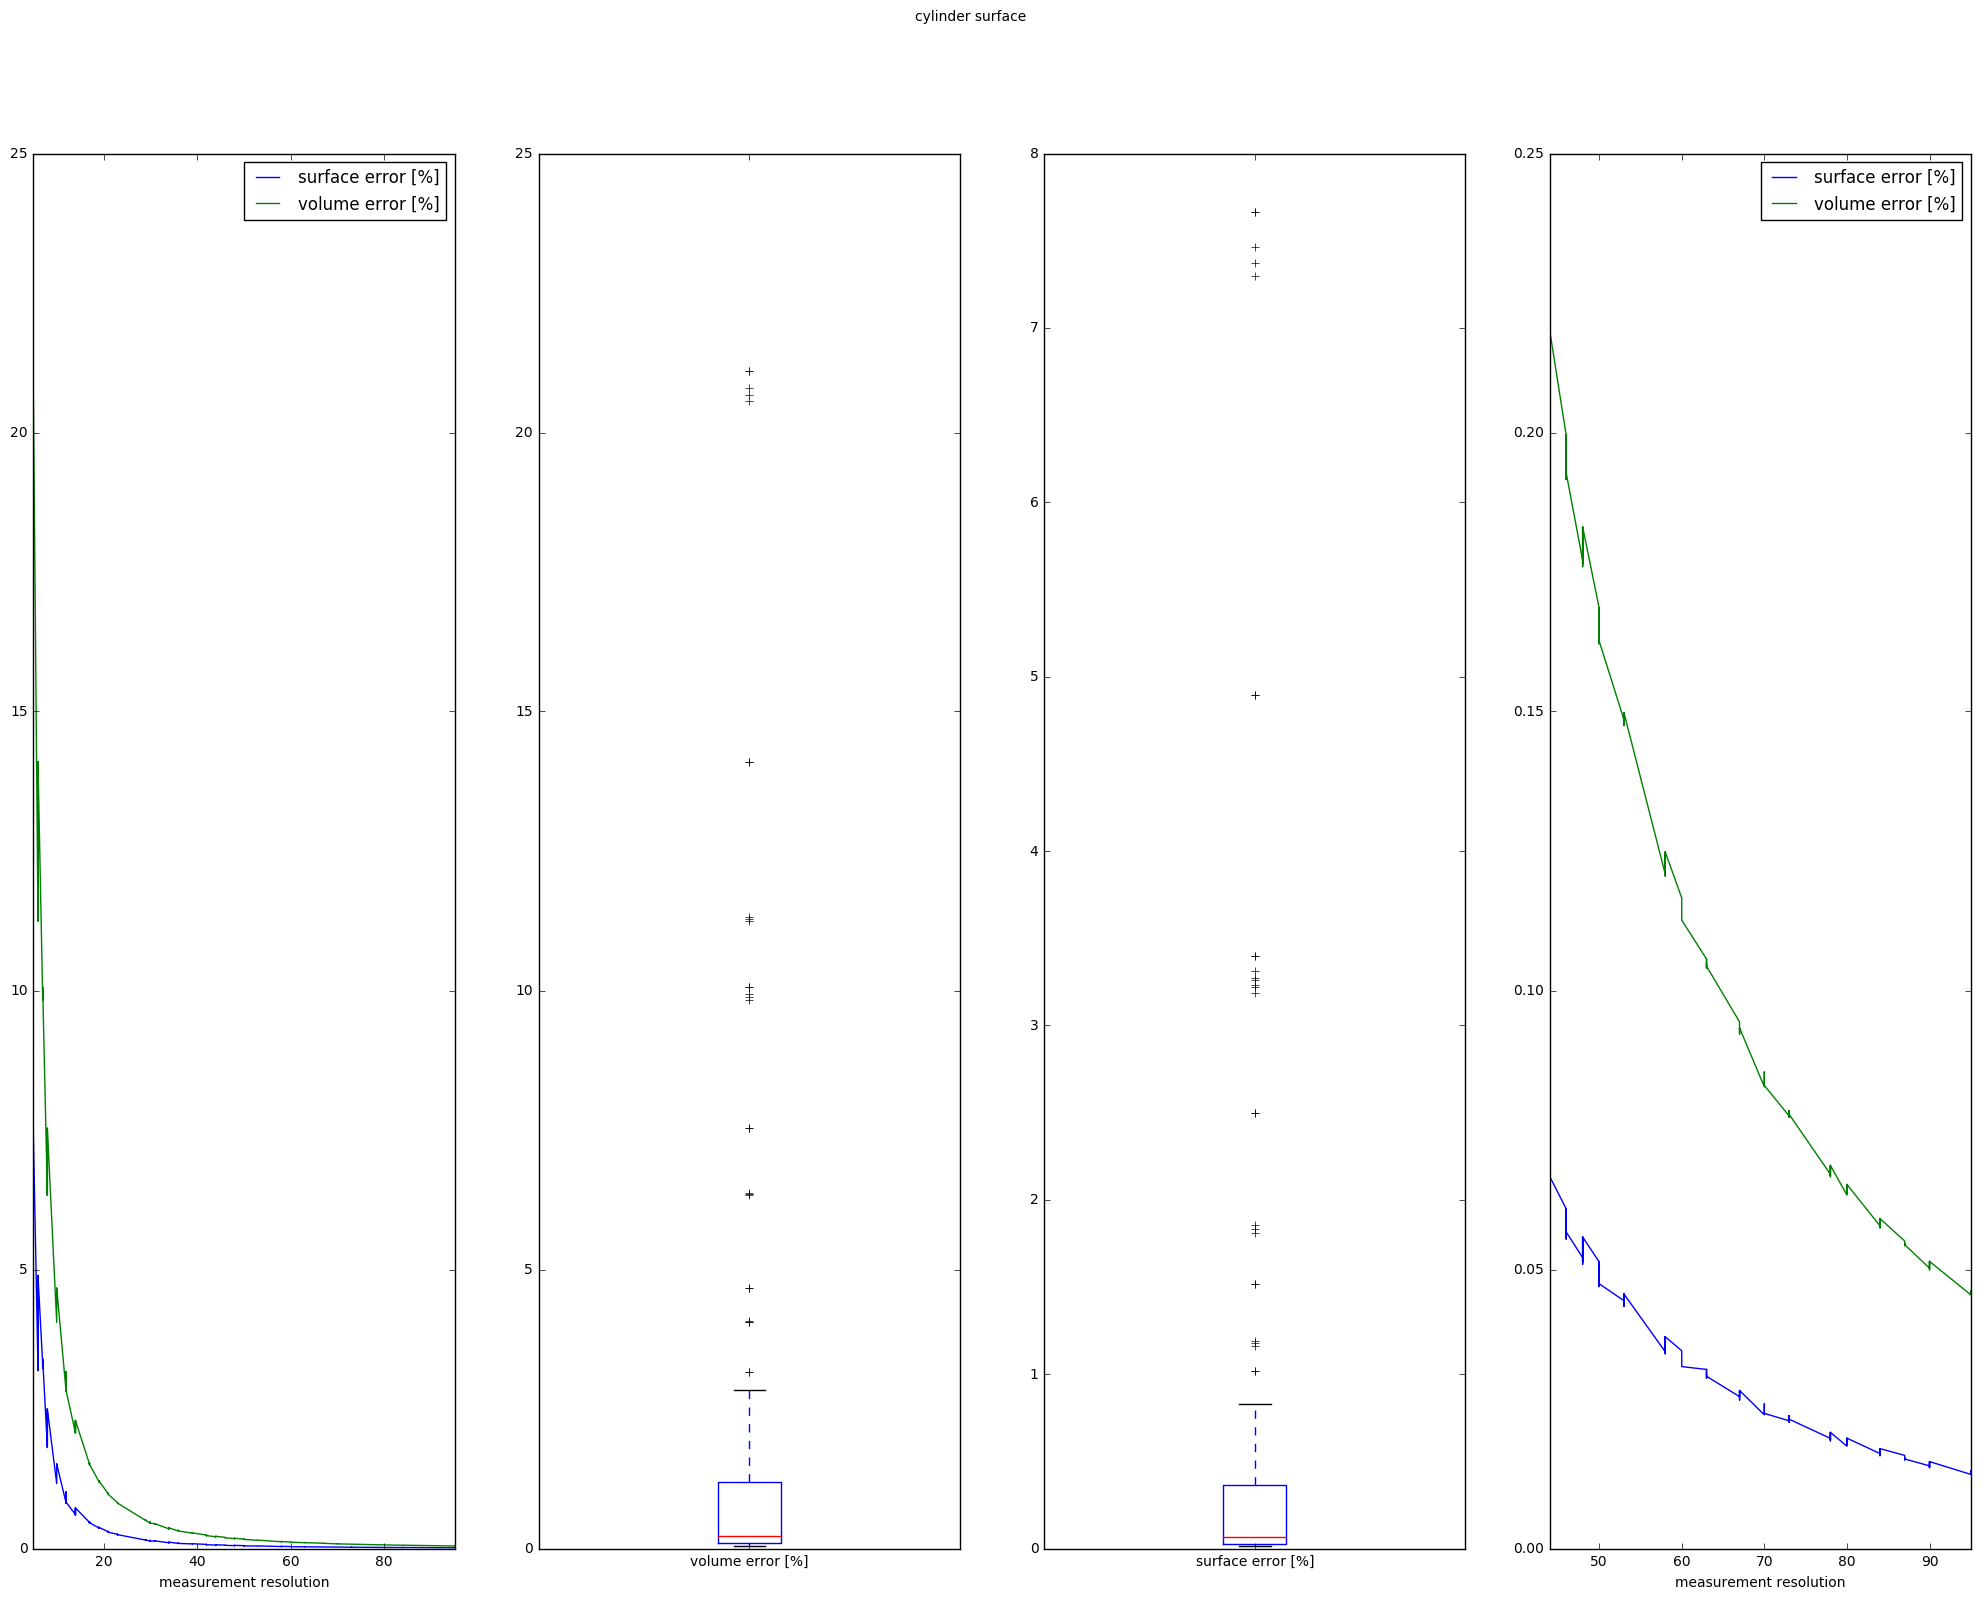

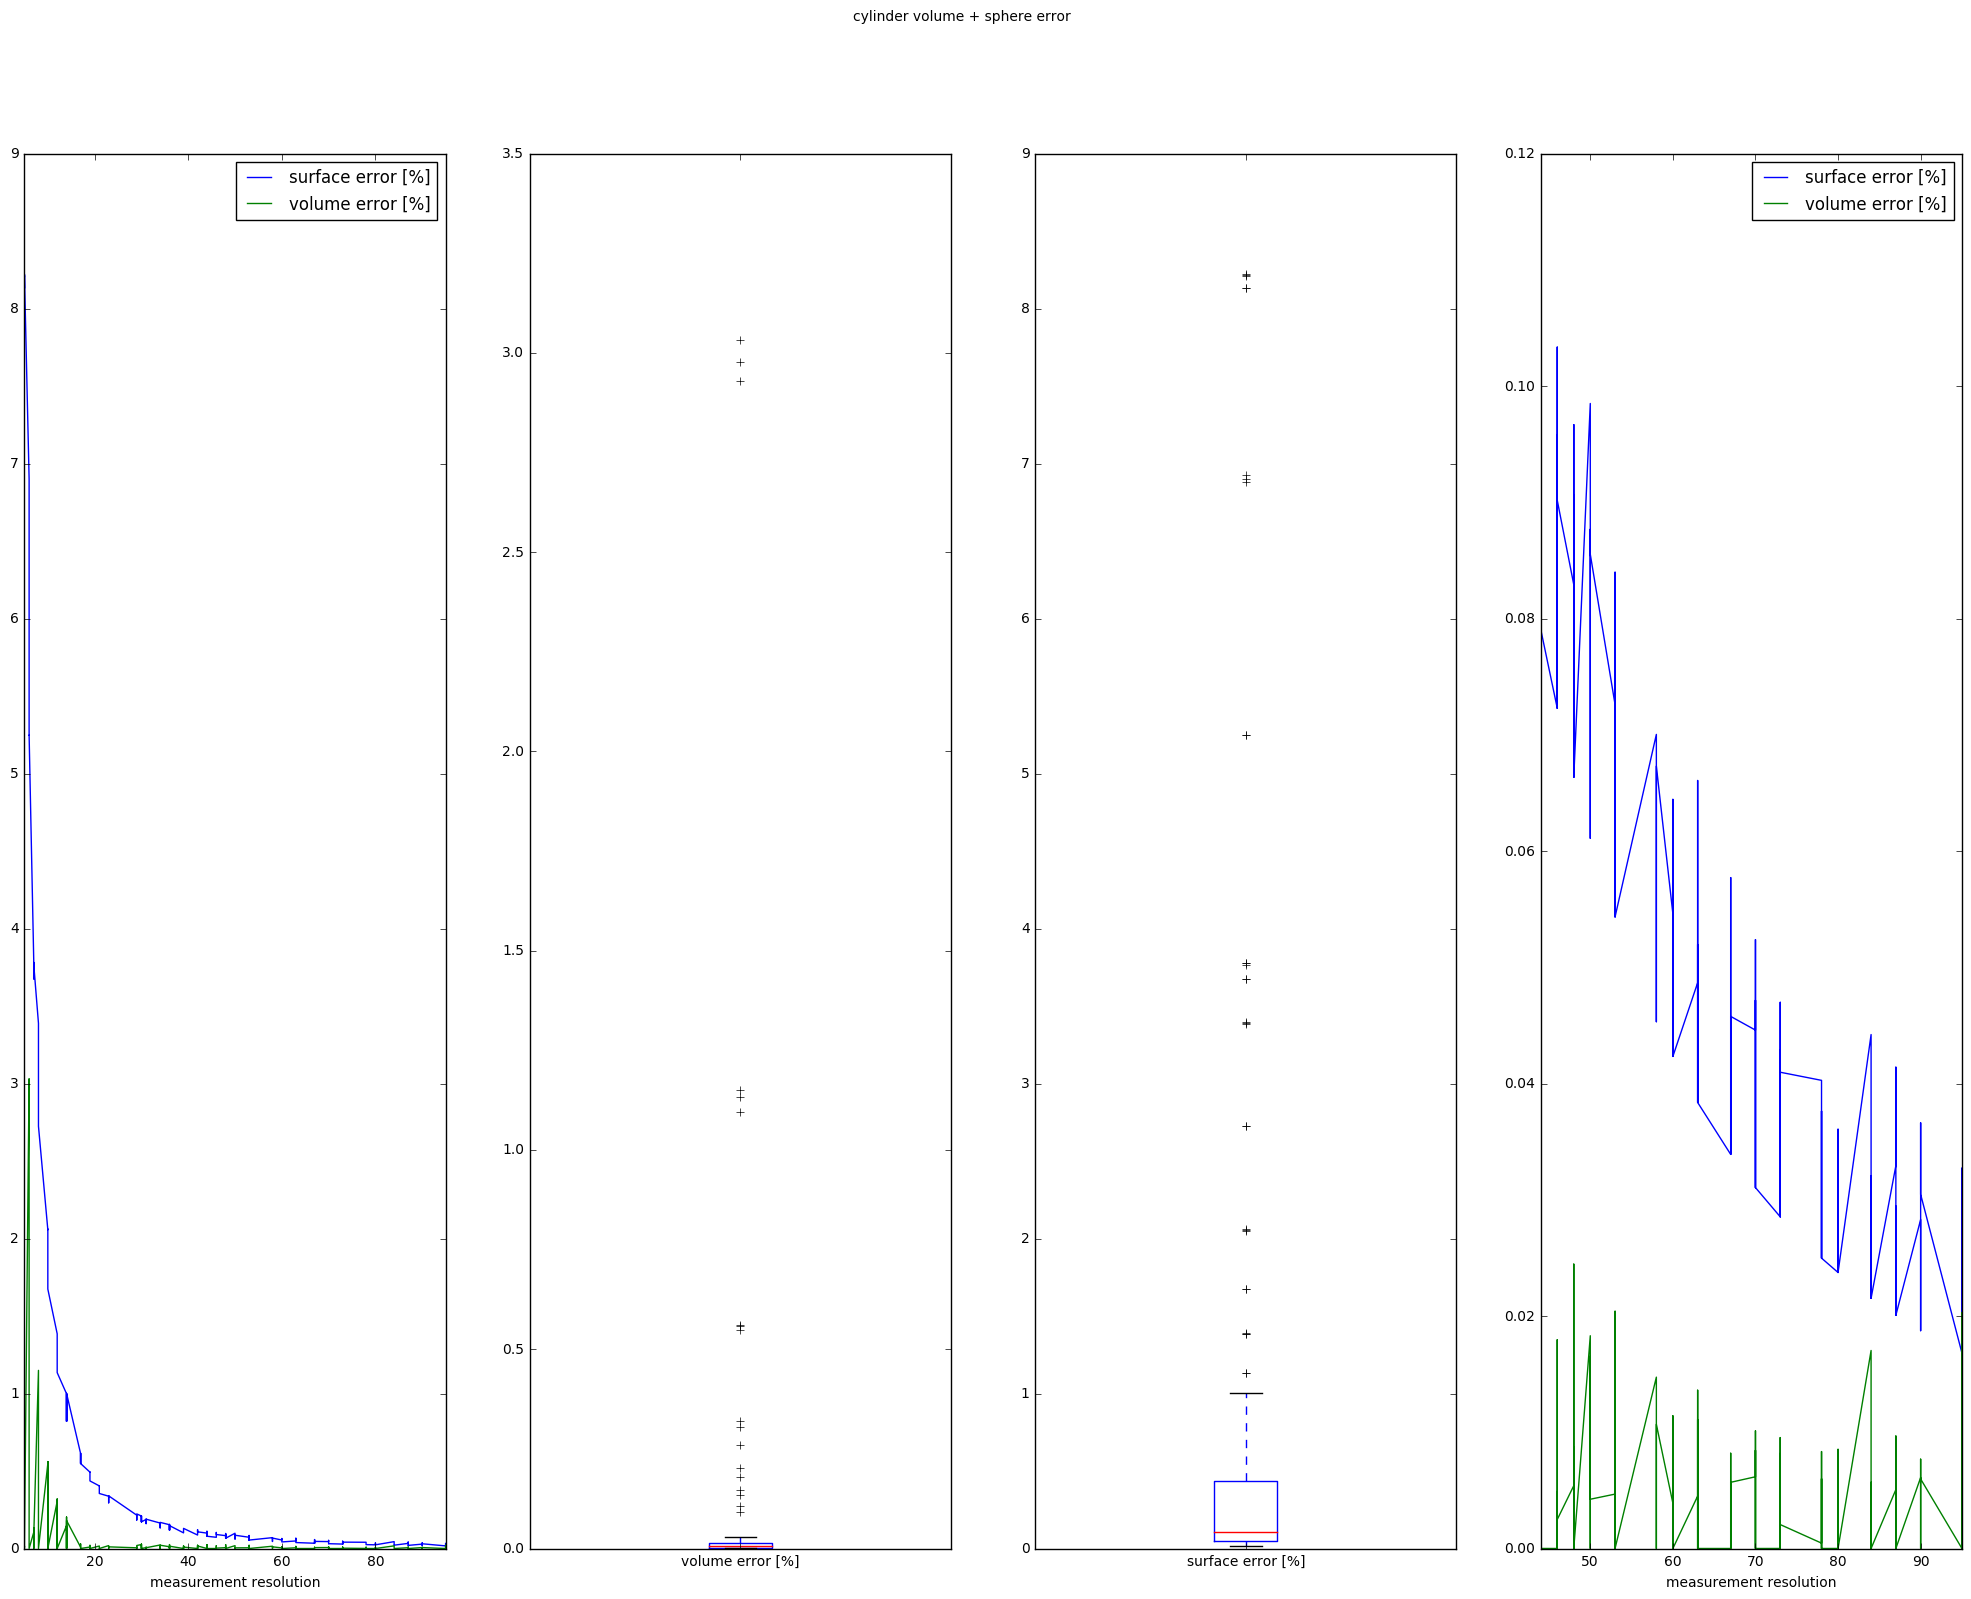

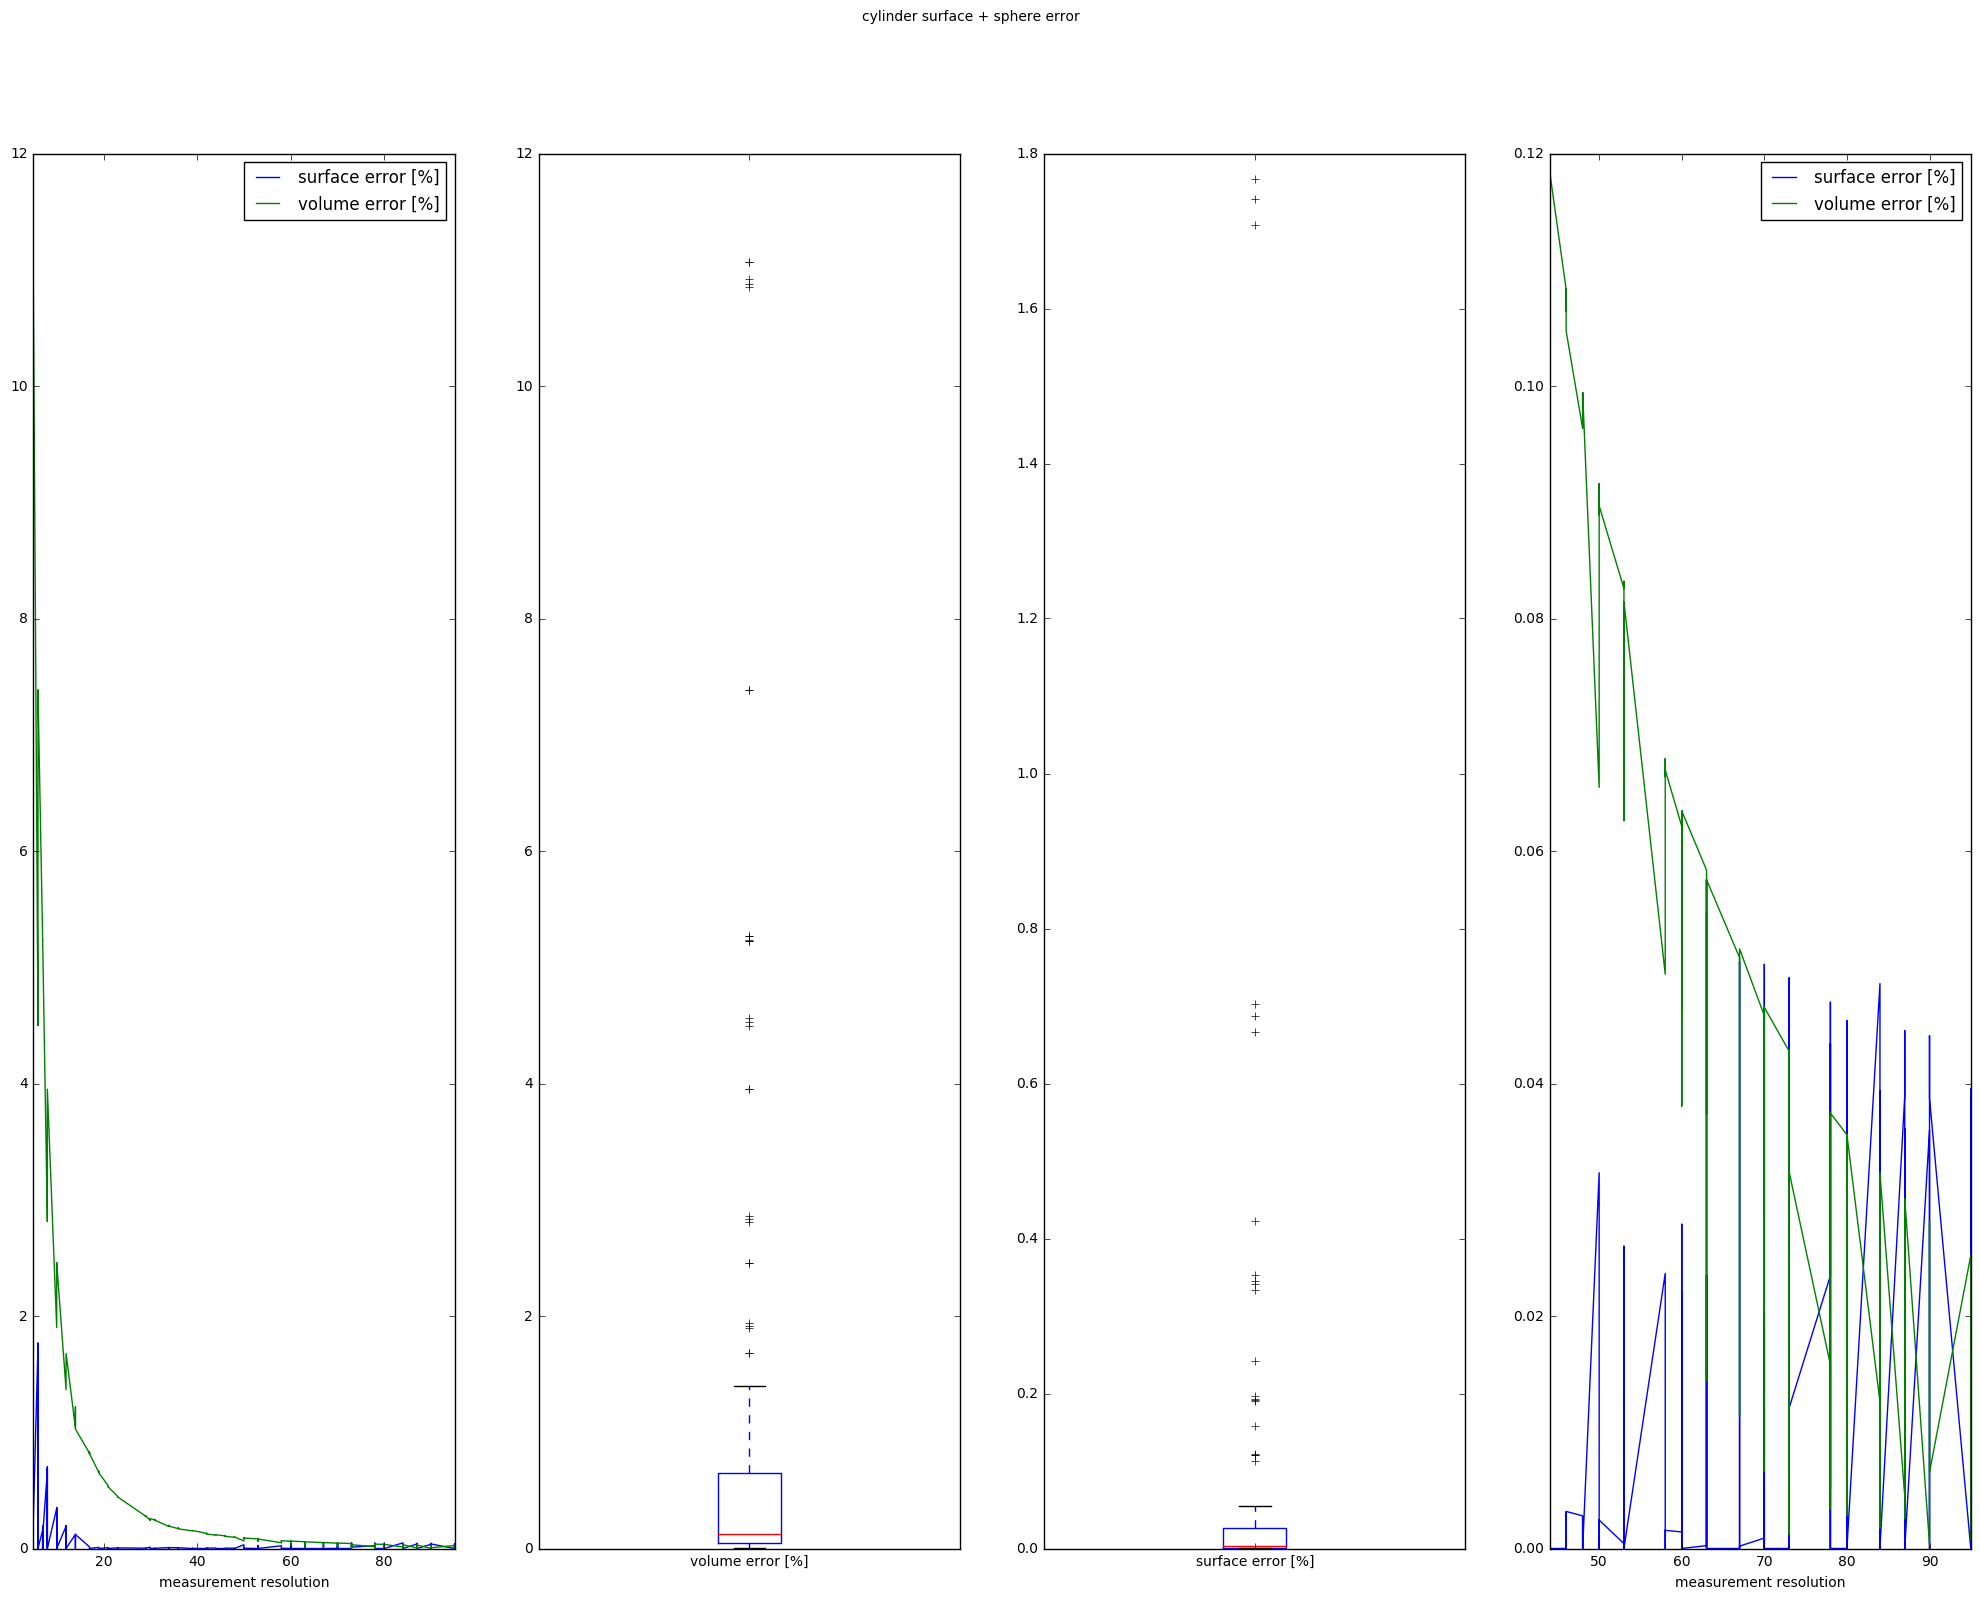

In [22]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df[note_key] == "compensation method 1 sphere " + radius_method
    ]
    dfsp = show_error(dfs)

# Tube - sphere join compensation

komenzace artefaktů vzniklých na spoji koule a válce


experiment `compensation method measurement 1 tube ` 

## 1 tube - surface


In [23]:
#  surface
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline

radius_method = "cylinder surface + sphere error"

dfs = df[
    # df["output note"] == "compensation method 1 tube" + radius_method
    df[note_key] == "compensation method measurement 1 tube " + radius_method
]
if len(dfs) > 0:
    dfsm = dfs.groupby("measurement_resolution").mean().reset_index()

    # x = list(dfsm["measurement_resolution"])
    # y = list(dfsm["radius_volume_estimation_numeric"] / dfsm["radius_volume_estimation"])
    x = list(dfsm["measurement_resolution"])
    # y = list(dfsm["radius_surface_estimation_numeric"] / dfsm["radius_surface_estimation"])
    y = list(dfsm["sphere_radius_join_surface_estimation_numeric"] / dfsm["sphere_radius_join_surface_estimation"])
    # y = list(dfsm["sphere_radius_join_surface_estimation_numeric"] / dfsm["radius_distribution_mean"])
    
    x.append(100)
    y.append(1.0)

    x.append(200)
    y.append(1.0)

    x = np.asarray(x)
    y = np.asarray(y)
    spl1 = InterpolatedUnivariateSpline(x, y)
    # spl1 = UnivariateSpline(x, y,k=6)
    # spl1.set_smoothing_factor(10.01)
    xs = np.linspace(5, 100, 100)

    plt.plot(
        xs[:], spl1(xs[:]), "b" , 
        x[:-2], y[:-2], "ro", 
        list(dfs["measurement_resolution"])[:], 
        list(dfs["sphere_radius_join_surface_estimation_numeric"]/dfs["sphere_radius_join_surface_estimation"])[:],
        "g."
    )
    stx = "x_csseje = ["
    for i in x:
        stx = stx + str(i) + ", "
    stx += "]"
    sty = "y_csseje = ["
    for i in y:
        sty = sty + str(i) + ", "
    sty += "]"
    print stx
    print sty

In [24]:
dfsp = show_error(dfs)

In [25]:
with pd.option_context('display.max_columns', None):
    display(dfsm)
    
    display(dfsm[["measurement_resolution", "radius_distribution_mean", 
                  "surface [mm^2]", "numeric surface [mm^2]",
                  "cylinder_surface", "sphere_surface",
                  "surface error [mm^2]", "surface error [%]", 
                  "volume [mm^3]", "numeric volume [mm^3]", 
                  "cylinder_volume",  "sphere_volume",
                  "volume error [mm^3]", "volume error [%]", 
                 ]])

,measurement_resolution,config appearance force_rewrite,config appearance noise_preview,config appearance show_aposteriori_surface,config appearance skip_volume_generation,config appearance surface_3d_preview,config filepattern_series_number,config generators Continuous tubes element_number,config generators Continuous tubes radius_distribution_fixed,config generators Continuous tubes radius_distribution_maximum,config generators Continuous tubes radius_distribution_mean,config generators Continuous tubes radius_distribution_minimum,config generators Continuous tubes radius_distribution_normal,config generators Continuous tubes radius_distribution_standard_deviation,config generators Continuous tubes radius_distribution_uniform,config generators Continuous tubes random_generator_seed,config generators Gensei n_objects,config generators Unconnected tubes allow_overlap,config generators Unconnected tubes element_number,config generators Unconnected tubes last_element_can_be_smaller,config generators Unconnected tubes length_distribution_mean,config generators Unconnected tubes length_distribution_standard_deviation,config generators Unconnected tubes maximum_1000_iteration_number,config generators Unconnected tubes orientation_alpha_rad,config generators Unconnected tubes orientation_anisotropic,config generators Unconnected tubes orientation_beta_rad,config generators Unconnected tubes orientation_variance_rad,config generators Unconnected tubes radius_distribution_fixed,config generators Unconnected tubes radius_distribution_maximum,config generators Unconnected tubes radius_distribution_mean,config generators Unconnected tubes radius_distribution_minimum,config generators Unconnected tubes radius_distribution_normal,config generators Unconnected tubes radius_distribution_standard_deviation,config generators Unconnected tubes radius_distribution_uniform,config generators Unconnected tubes random_generator_seed,config generators Unconnected tubes tube_shape,config generators Unconnected tubes volume_fraction,config generators Voronoi tubes element_number,config generators Voronoi tubes radius_distribution_fixed,config generators Voronoi tubes radius_distribution_maximum,config generators Voronoi tubes radius_distribution_mean,config generators Voronoi tubes radius_distribution_minimum,config generators Voronoi tubes radius_distribution_normal,config generators Voronoi tubes radius_distribution_standard_deviation,config generators Voronoi tubes radius_distribution_uniform,config generators Voronoi tubes random_generator_seed,config measurement tube_shape,config output aposteriori_measurement,config output aposteriori_measurement_multiplier,config postprocessing add_noise,config postprocessing background_intensity,config postprocessing gaussian_blur,config postprocessing gaussian_filter_sigma_mm,config postprocessing limit_negative_intensities,config postprocessing measurement_resolution,config postprocessing negative,config postprocessing noise_exponent,config postprocessing noise_lambda0,config postprocessing noise_lambda1,config postprocessing noise_mean,config postprocessing noise_rng_seed,config postprocessing noise_std,measurement area volume [mm^3],measurement count [],measurement length [mm],measurement length d. [mm^-2],measurement negative numeric volume [mm^3],measurement negative numeric volume fraction [],measurement numeric surface [mm^2],measurement numeric volume [mm^3],measurement numeric volume fraction [],measurement surface [mm^2],measurement surface d. [mm^-1],measurement volume [mm^3],measurement volume d. [],processing_info step1_finished,processing_info step1_generate_time_s,processing_info step1_generate_vtk_time_s,processing_info step1_total_time_s,processing_info step2_finished,processing_info step2_generate_volume_time_s,processing_info step2_numeric_measurement_time_s,processing_info step2_save_volume_time_s,processing_info step2_total_time_s,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric 

,measurement_resolution,radius_distribution_mean,surface [mm^2],numeric surface [mm^2],cylinder_surface,sphere_surface,surface error [mm^2],surface error [%],volume [mm^3],numeric volume [mm^3],cylinder_volume,sphere_volume,volume error [mm^3],volume error [%]
0,5,1.0,14.714019,11.935486,0.0,14.714019,2.778533,18.908261,5.335697,3.468966,0.0,5.335697,1.866731,35.032878
1,6,1.0,14.714019,12.920627,0.0,14.714019,1.793392,12.262606,5.335697,4.085802,0.0,5.335697,1.249895,23.599483
2,7,1.0,14.714019,13.307882,0.0,14.714019,1.406137,9.568819,5.335697,4.347867,0.0,5.335697,0.987830,18.538450
3,8,1.0,14.714019,13.692871,0.0,14.714019,1.021148,6.972469,5.335697,4.609336,0.0,5.335697,0.726361,13.693786
4,10,1.0,14.714019,14.057373,0.0,14.714019,0.656646,4.480166,5.335697,4.864381,0.0,5.335697,0.471316,8.877000
5,12,1.0,14.714019,14.257088,0.0,14.714019,0.456931,3.116032,5.335697,5.006151,0.0,5.335697,0.329546,6.202813
6,14,1.0,14.714019,14.378020,0.0,14.714019,0.335999,2.290568,5.335697,5.092674,0.0,5.335697,0.243023,4.572145
7,17,1.0,14.714019,14.481092,0.0,14.714019,0.232927,1.585040,5.335697,5.166818,0.0,5.335697,0.168878,3.169064
8,19,1.0,14.714019,14.527996,0.0,14.714019,0.186023,1.265863,5.335697,5.200671,0.0,5.335697,0.135026,2.533784
9,21,1.0,14.714019,14.562049,0.0,14.714019,0.151970,1.034134,5.335697,5.225298,0.0,5.335697,0.110399,2.071644


## 1 tube volume measuerement

In [26]:
# volume 
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline

radius_method = "cylinder volume + sphere error"
# radius_method = "cylinder surface + sphere error"

dfs = df[
    df[note_key] == "compensation method measurement 1 tube " + radius_method
]
if len(dfs) > 0:
    dfsm = dfs.groupby("measurement_resolution").mean().reset_index()

    x = list(dfsm["measurement_resolution"])
    y = list(dfsm["sphere_radius_join_volume_estimation_numeric"] / dfsm["sphere_radius_join_volume_estimation"])

    # x.append(100)
    # y.append(1.0)

    x.append(200)
    y.append(1.0)

    x = np.asarray(x)
    y = np.asarray(y)
    spl1 = InterpolatedUnivariateSpline(x, y)
    spl1 = UnivariateSpline(x, y,k=2)
    spl1.set_smoothing_factor(50.5)
    xs = np.linspace(5, 100, 100)

    plt.plot(
        xs[:], spl1(xs[:]), "b" , 
        x[:-2], y[:-2], "ro", 
    )
    stx = "x_cvseje = ["
    for i in x:
        stx = stx + str(i) + ", "
    stx += "]"
    sty = "y_cvseje = ["
    for i in y:
        sty = sty + str(i) + ", "
    sty += "]"
    print stx
    print sty

In [27]:
dfsp = show_error(dfs)

In [28]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "compensation method measurement 1 tube " + radius_method
    ]
    dfsp = show_error(dfs)

In [29]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "compensation method 1 tube " + radius_method
    ]
    dfsp = show_error(dfs)

## TODO - move this - 3 spheres various radius

In [30]:
run_label = "compensation method 3 spheres various radius "
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == run_label + radius_method
    ]
    dfsp = show_error(dfs, x_key="radius_distribution_mean")

## tubes

### 1 Tube evaluation

In [31]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "compensation method 1 tube " + radius_method
    ]
    dfsp = show_error(dfs) #, x_key="radius_distribution_mean")

### 1 tube various radius

In [32]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "compensation method 1 tube various radius " + radius_method
    ]
    dfsp = show_error(dfs, x_key="radius_distribution_mean")
    print len(dfs)

0
0
0
0
0
0
0
0
0


In [33]:
run_label = "compensation method 1 tube various length "
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == run_label + radius_method
    ]
    dfsp = show_error(dfs, x_key="length_distribution_mean")
    # print len(dfs)

In [34]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df[note_key] == "compensation method 1 tube mix " + radius_method
    ]
    dfsp = show_error(dfs)

### 5 tubes

In [35]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df[note_key] == "compensation method 5 tubes " + radius_method
    ]
    dfsp = show_error(dfs)

## Fixed resolution

In [36]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "fixed resolution " + radius_method
    ]
    dfsp = show_error(dfs)

# Best test

In [37]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "best test " + radius_method
    ]
    dfsp = show_error(dfs)

# Simple check - this computes selected radius from data

/home/mjirik/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


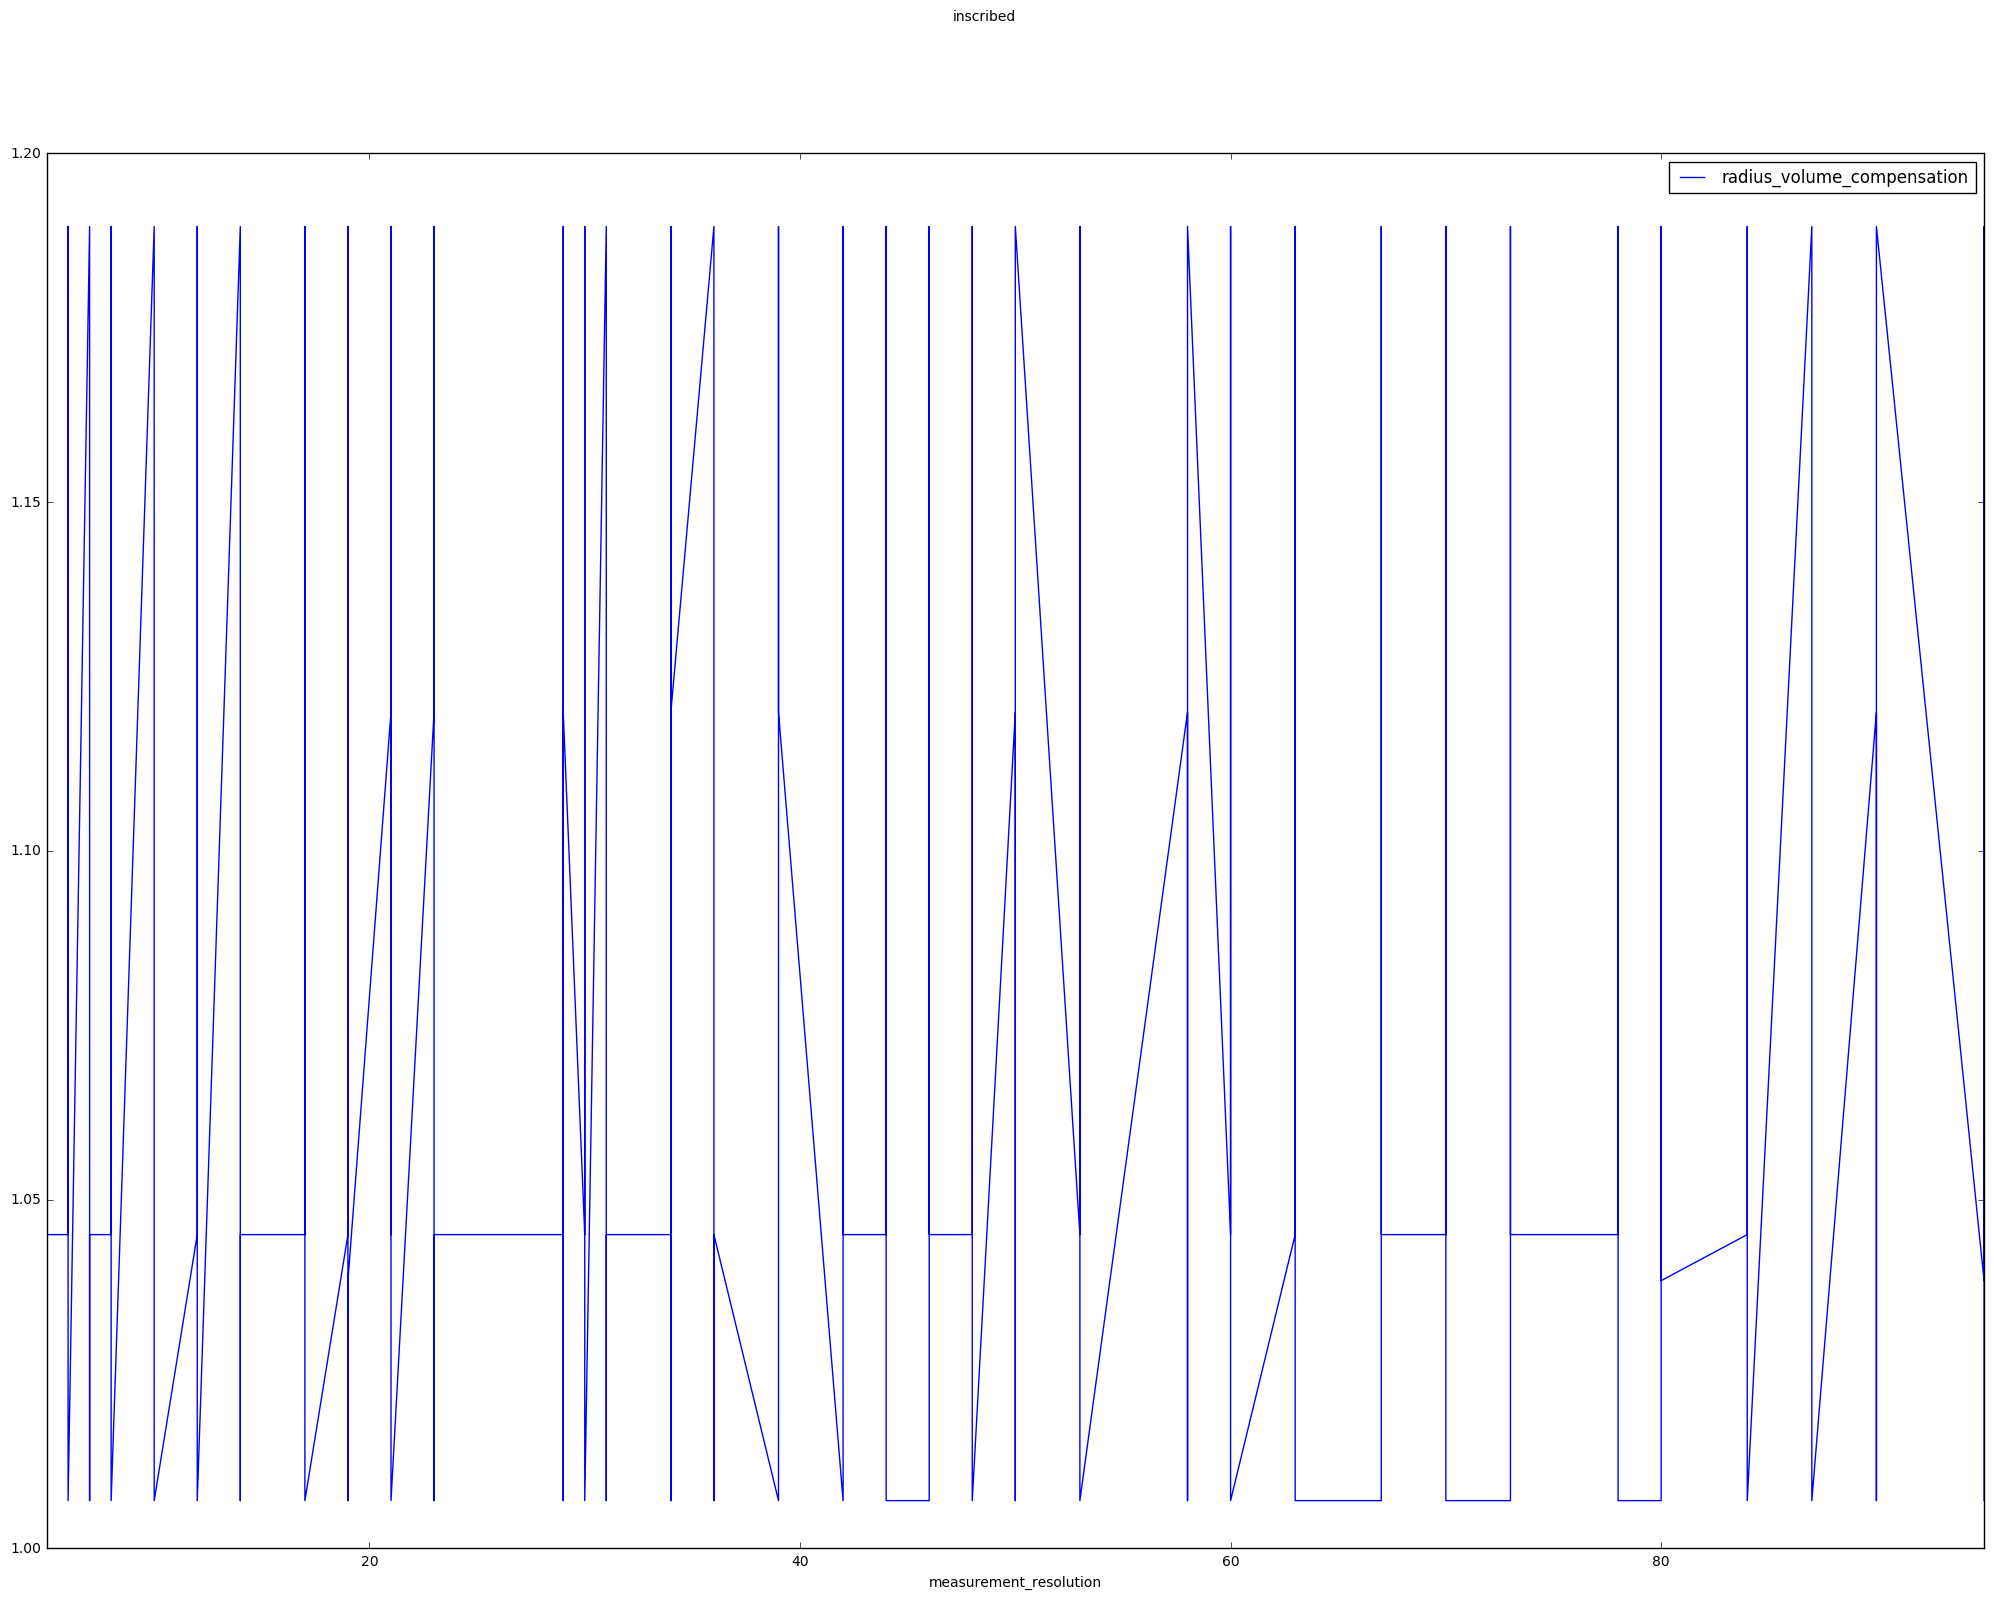

In [38]:
# just for control - this should be exactly same as selected radius
radius_method = "inscribed"
dfs = df[
    df[note_key] == "compensation method 1 sphere " + radius_method
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]

if len(dfs) > 1:
    dfs["radius_volume_compensation"] = (3 * dfs["volume [mm^3]"] / (4* np.pi))**(1.0/3.0)
    dfsp = dfs[["radius_volume_compensation", "measurement_resolution"]].sort_values(
        "measurement_resolution")

    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(111)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    plt.suptitle(radius_method)